# Importing Libraries

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score,roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder,StandardScaler
from xgboost import XGBClassifier

In [8]:
df = pd.read_csv("/Users/utkrishtjain/Desktop/aa_BreastCancer/Breast_Cancer.csv")

In [9]:
df.head(5)

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


## Listing Column Names

In [10]:
df.columns

Index(['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')

# Creating Pie Chart

# Plot Based on Distribution of the 'Status'

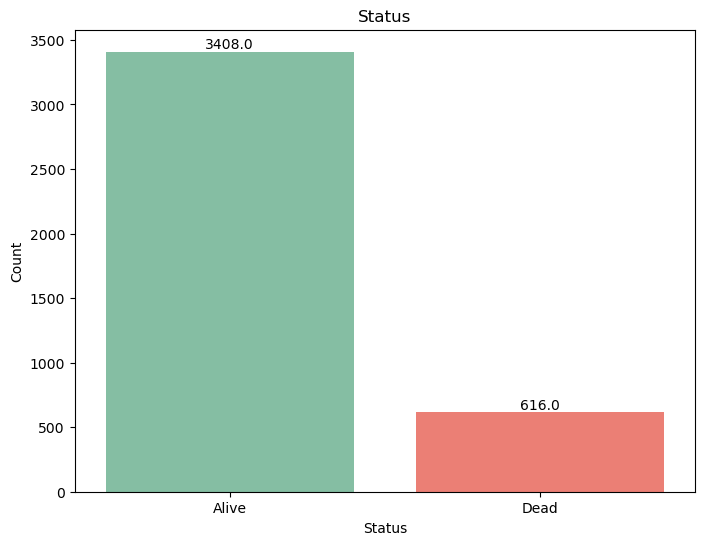

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a custom color palette
custom_palette = {'Alive': '#7BC8A4', 'Dead': '#FF6F61'}

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Status', data=df, palette=custom_palette)
plt.title('Status')
plt.xlabel('Status')
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.show()


## Relationships and Distributions of the Features with Clear Distinction Based on  the 'Status' column

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed

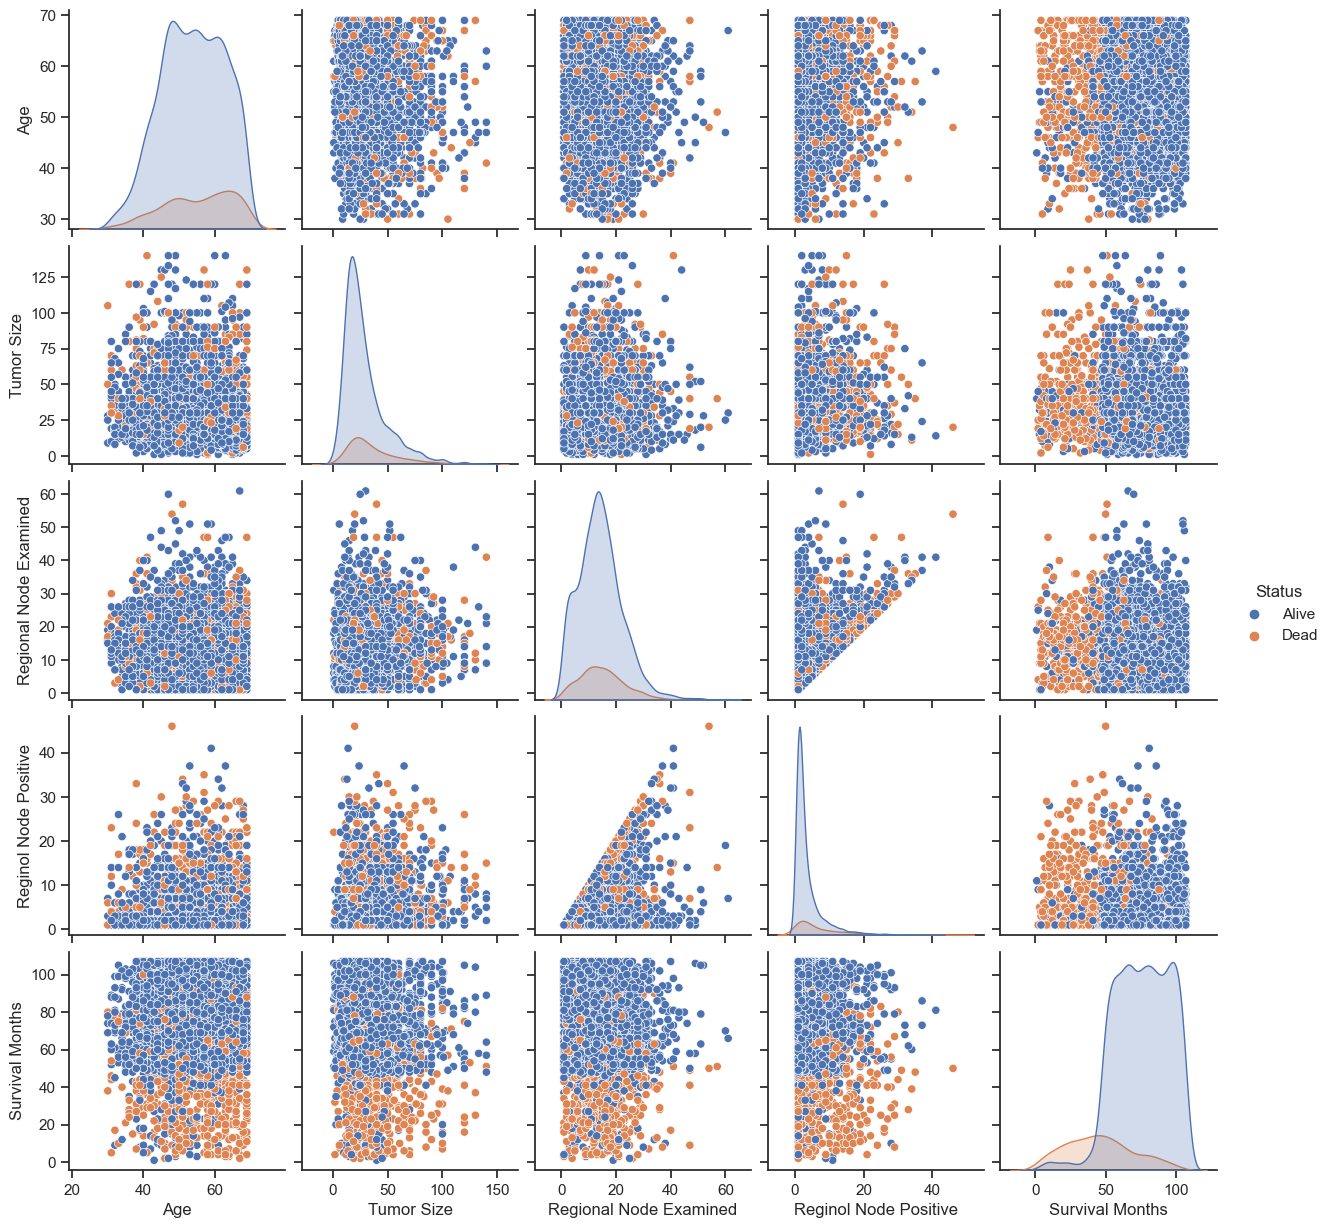

In [13]:
import seaborn as sns
sns.set_theme(style="ticks")

sns.pairplot(df, hue="Status")

# Distribution of Ages Differentiated By Status Histogram With KDE Overlay

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='Age', ylabel='Count'>

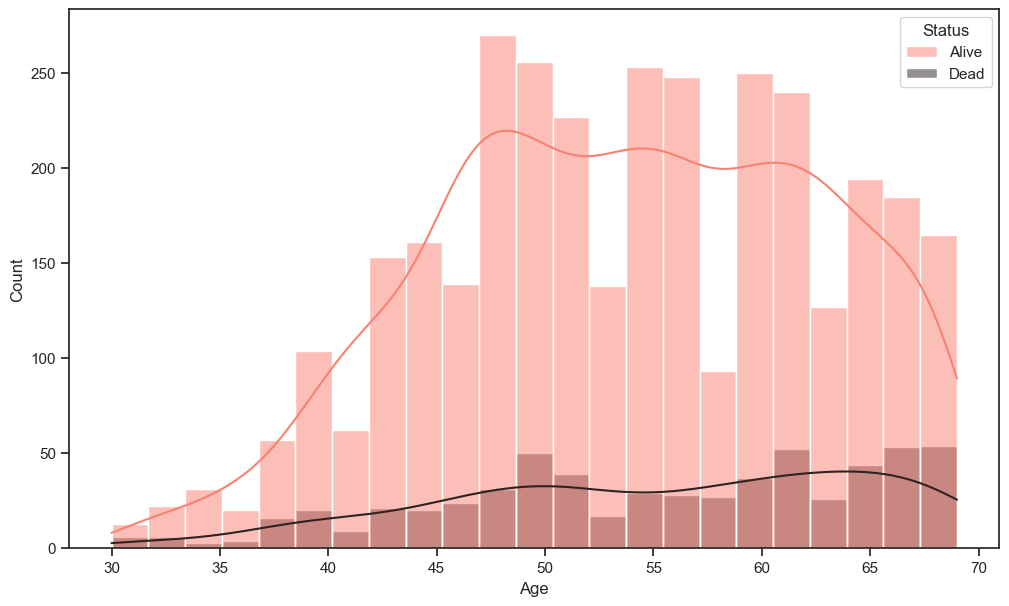

In [14]:
plt.figure(figsize=(12,7))
sns.histplot(data=df, x='Age', hue='Status',palette="dark:salmon_r",kde=True)

# Distribution of Tumor Size Across Different Stages

Text(0.5, 1.0, 'Tumor Size vs Stage')

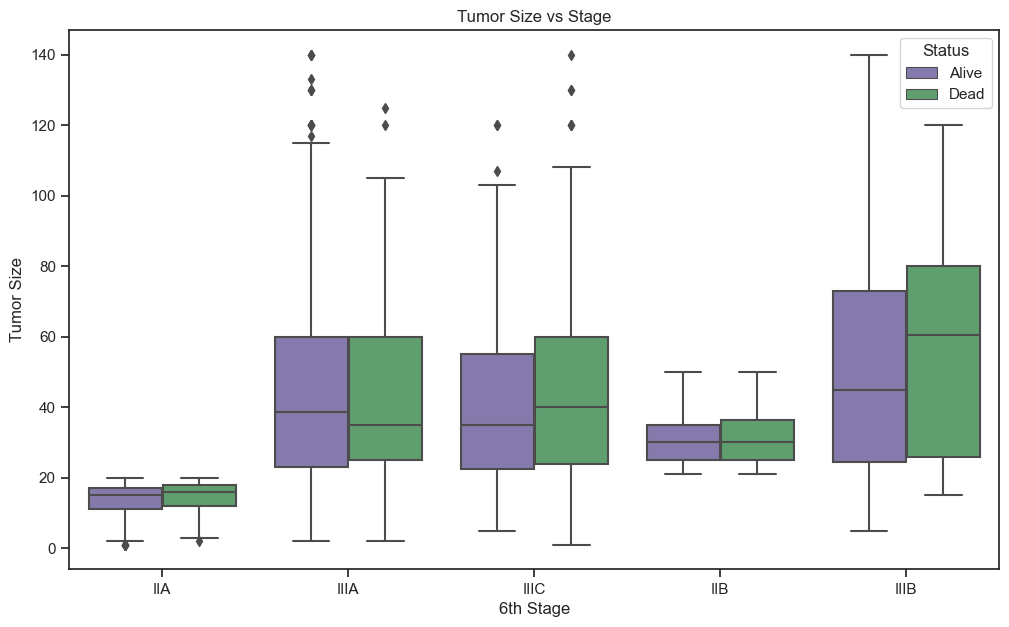

In [15]:
plt.figure(figsize=(12,7))
sns.boxplot(x="6th Stage", y="Tumor Size",
            hue="Status", palette=["m", "g"],
            data=df)
plt.title("Tumor Size vs Stage")

# Distribution of Tumor Size Across Different Grades

Text(0.5, 1.0, 'Tumor Size vs Grade')

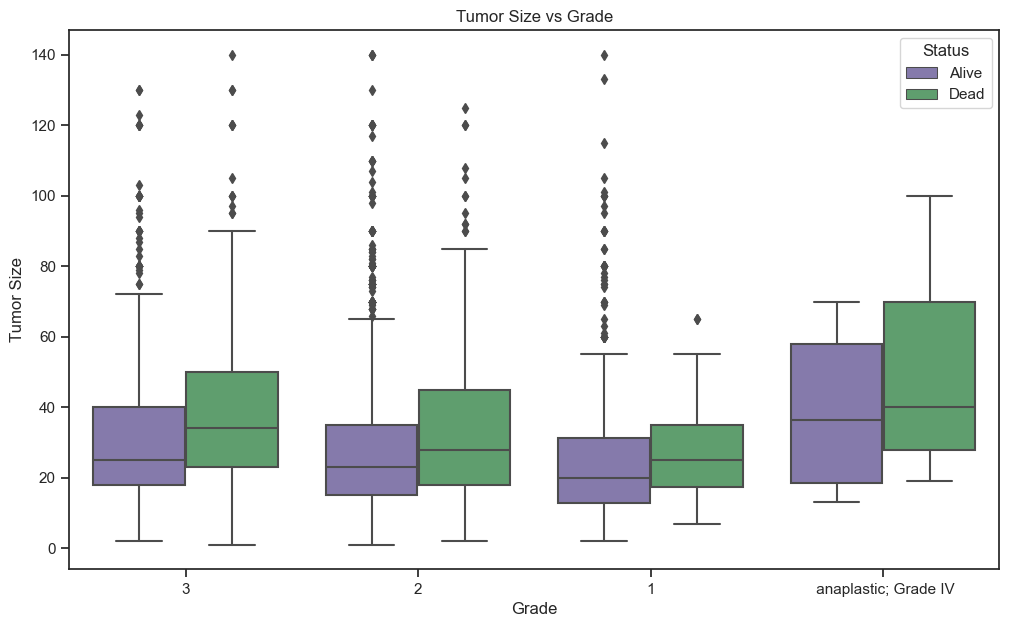

In [16]:
plt.figure(figsize=(12,7))
sns.boxplot(x="Grade", y="Tumor Size",
            hue="Status", palette=["m", "g"],
            data=df)
plt.title("Tumor Size vs Grade")

## Correlation Matrix

In [20]:
# Check if 'White' column exists and drop it if it does
if 'White' in df.columns:
    df_new = df.drop('White', axis=1)
else:
    df_new = df.copy()

# Select only numeric columns
numeric_df = df_new.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation = numeric_df.corr()

styled_corr = correlation.style.format(precision=6).set_table_styles(
    [{'selector': 'th', 'props': [('text-align', 'center')]}]
).set_properties(**{'text-align': 'center'})
display(styled_corr)

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
Age,1.000000,-0.077215,-0.033345,0.012586,-0.009390
Tumor Size,-0.077215,1.000000,0.104352,0.242322,-0.086901
Regional Node Examined,-0.033345,0.104352,1.000000,0.411580,-0.022054
Reginol Node Positive,0.012586,0.242322,0.411580,1.000000,-0.135214
Survival Months,-0.009390,-0.086901,-0.022054,-0.135214,1.000000


## Correlation Matrix HeatMap

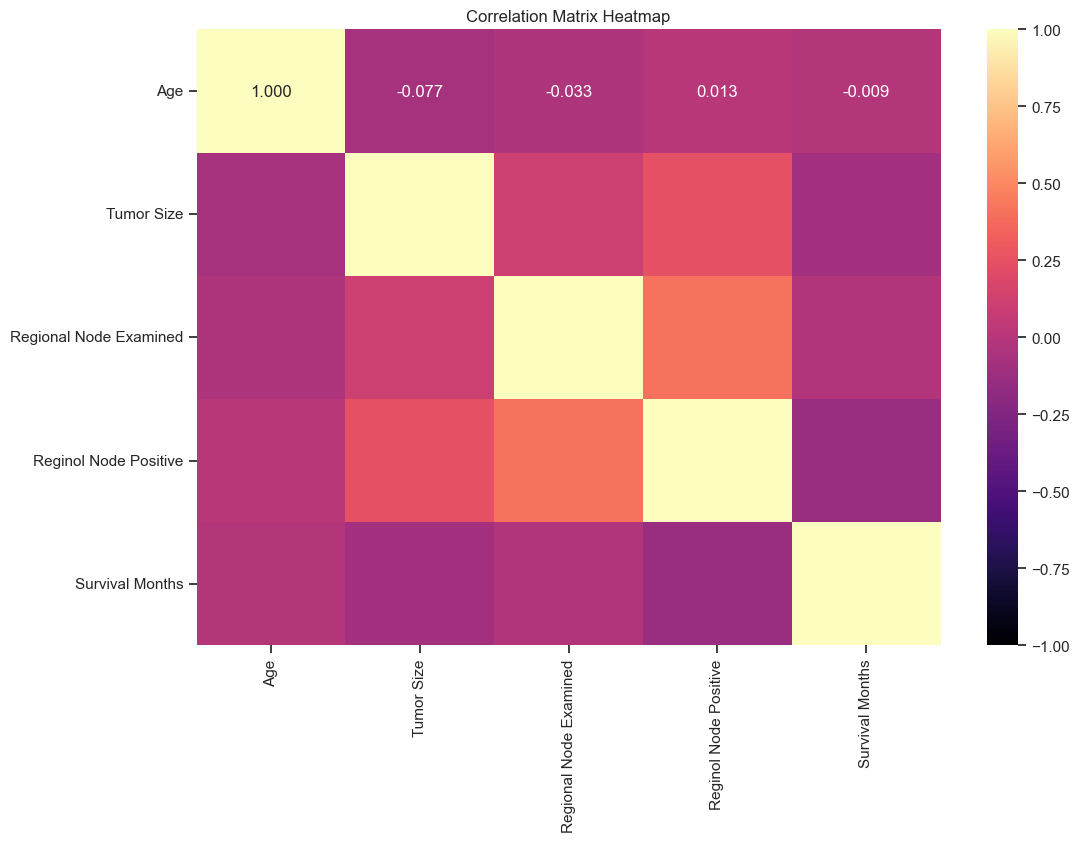

In [34]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, fmt=".3f", cmap='magma', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

## Separating Features and Target Variable

In [22]:
X =df.drop(columns=['Status'])
y = df['Status']

# Random Forest Regression

In [44]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert categorical variables to dummy variables for the training set
x_train_encoded = pd.get_dummies(x_train)

# Ensure the test set has the same columns as the training set
x_test_encoded = pd.get_dummies(x_test)
x_test_encoded = x_test_encoded.reindex(columns=x_train_encoded.columns, fill_value=0)

# Encode target labels with values between 0 and 1
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Define and fit the model
model = RandomForestClassifier(n_estimators=100,
                               max_depth=3,
                               random_state=42,
                               criterion='entropy',
                               class_weight='balanced')
model.fit(x_train_encoded, y_train_encoded)

# Make predictions on the training set to ensure the model works correctly
training_pred = model.predict(x_train_encoded)

# Output predictions for training data as 0 and 1
print(training_pred)

# Make predictions on the test set
test_pred = model.predict(x_test_encoded)

# Output predictions for test data as 0 and 1
print(test_pred)
1

[0 0 0 ... 1 0 0]
[0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 0 0 1 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0
 1 0 0 0 1 1 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1
 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0 0
 0 0 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0
 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0
 1 0 0 

1

## Make predictions on the training set to ensure the model works correctly

In [45]:
training_pred = model.predict(x_train_encoded)

## Make predictions on the test set

In [46]:
test_pred = model.predict(x_test_encoded)

In [47]:
print('Training Accuracy Score:', accuracy_score(y_train_encoded, training_pred))
print('Test Accuracy Score:', accuracy_score(y_test_encoded, test_pred))
print('Recall Score:', recall_score(y_test_encoded, test_pred))
print('Precision Score:', precision_score(y_test_encoded, test_pred))
print('F1 Score:', f1_score(y_test_encoded, test_pred))


Training Accuracy Score: 0.8254116185150668
Test Accuracy Score: 0.8496894409937888
Recall Score: 0.675
Precision Score: 0.49693251533742333
F1 Score: 0.5724381625441696


## Confusion Matrix For Random Forest

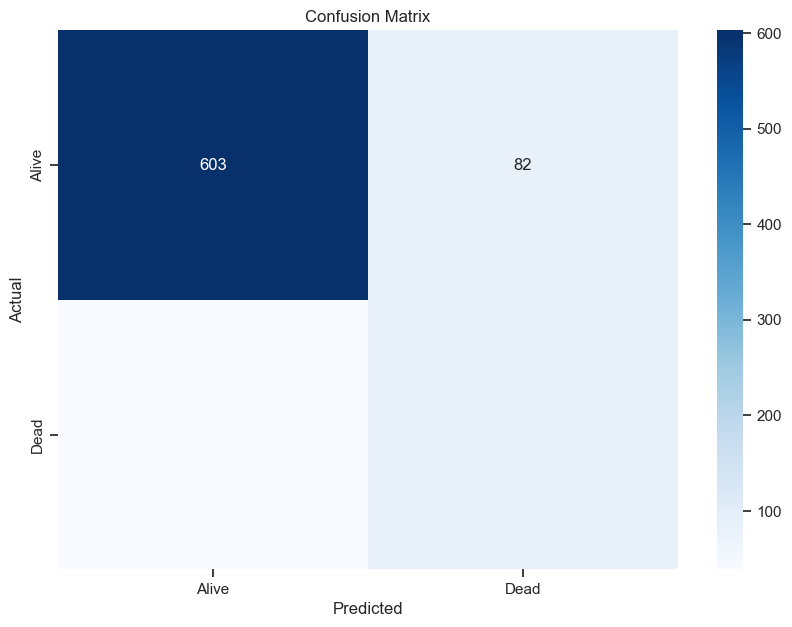

In [48]:
conf_matrix = confusion_matrix(y_test_encoded, test_pred)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Logistic Regression

In [49]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train_encoded)
X_test_scaled = scaler.transform(x_test_encoded)


logistic_model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
logistic_model.fit(X_train_scaled, y_train_encoded)

# Make predictions on the training set to ensure the model works correctly
training_pred = logistic_model.predict(X_train_scaled)

# Output predictions for training data as 0 and 1
print("Training Predictions:")
print(training_pred)

# Make predictions on the test set
test_pred = logistic_model.predict(X_test_scaled)

# Output predictions for test data as 0 and 1
print("Test Predictions:")
print(test_pred)

# Evaluate the model
print("Logistic Regression Evaluation:")

# Training evaluation
print("Training Accuracy Score:", accuracy_score(y_train_encoded, training_pred))

# Test evaluation
print("Test Accuracy Score:", accuracy_score(y_test_encoded, test_pred))
print("Recall Score:", recall_score(y_test_encoded, test_pred))
print("Precision Score:", precision_score(y_test_encoded, test_pred))
print("F1 Score:", f1_score(y_test_encoded, test_pred))

Training Predictions:
[0 0 0 ... 0 0 0]
Test Predictions:
[0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 1 1 1 0 1 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 1 1 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0
 0 1 1 1 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0
 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1
 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0
 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0 0 0 1 0 0 1 0
 0 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0
 1 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1 1
 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0

## Confusion Matrix For Logistic Regression

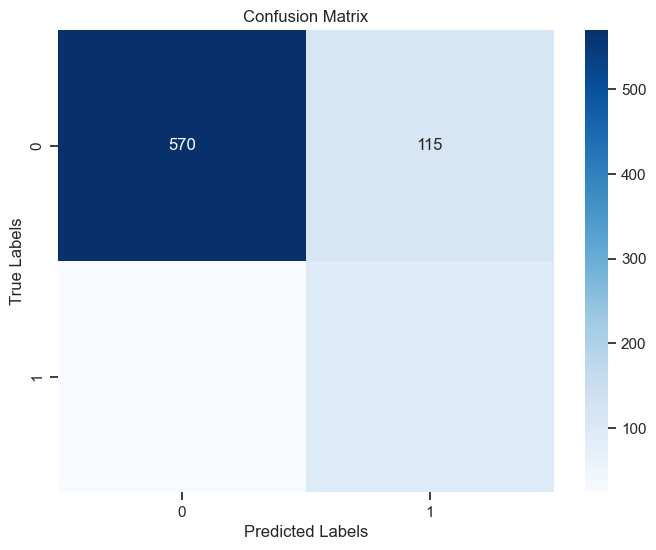

In [50]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, test_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# XGBoost

In [51]:
# Define and fit the XGBoost model
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb_model.fit(X_train_scaled, y_train_encoded)

# Make predictions on the training set to ensure the model works correctly
training_pred = xgb_model.predict(X_train_scaled)

# Output predictions for training data as 0 and 1
print("Training Predictions:")
print(training_pred)

# Make predictions on the test set
test_pred = xgb_model.predict(X_test_scaled)

# Output predictions for test data as 0 and 1
print("Test Predictions:")
print(test_pred)

# Evaluate the model
print("XGBoost Evaluation:")

# Training evaluation
print("Training Accuracy Score:", accuracy_score(y_train_encoded, training_pred))

# Test evaluation
print("Test Accuracy Score:", accuracy_score(y_test_encoded, test_pred))
print("Recall Score:", recall_score(y_test_encoded, test_pred))
print("Precision Score:", precision_score(y_test_encoded, test_pred))
print("F1 Score:", f1_score(y_test_encoded, test_pred))

Training Predictions:
[0 0 0 ... 0 0 0]
Test Predictions:
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

## Confusion Matrix for XGBoost

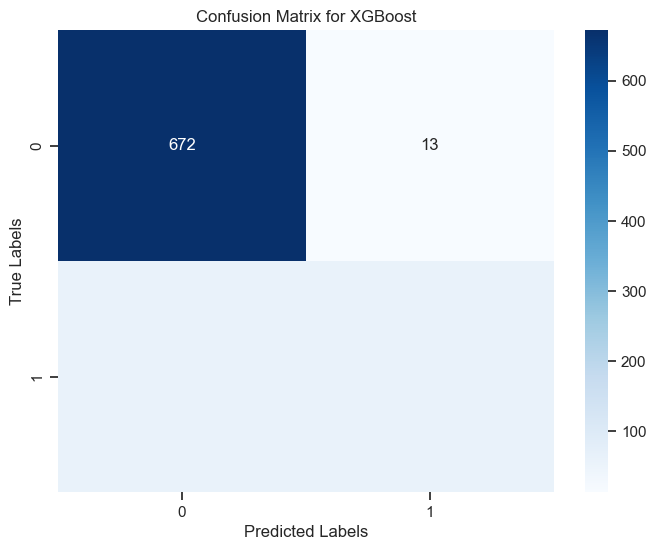

In [52]:
conf_matrix = confusion_matrix(y_test_encoded, test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for XGBoost')
plt.show()


#  Receiver Operating Characteristic (ROC) Curve

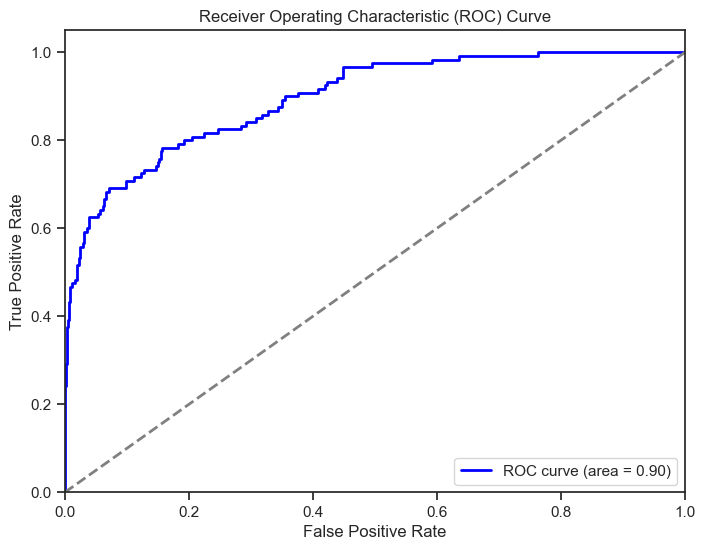

In [53]:
# Compute predicted probabilities for the test set
test_pred_prob = xgb_model.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test_encoded, test_pred_prob)
roc_auc = roc_auc_score(y_test_encoded, test_pred_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
